In [ ]:
# فراخوانی فایل CSV

In [2]:
import pandas as pd
data= pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


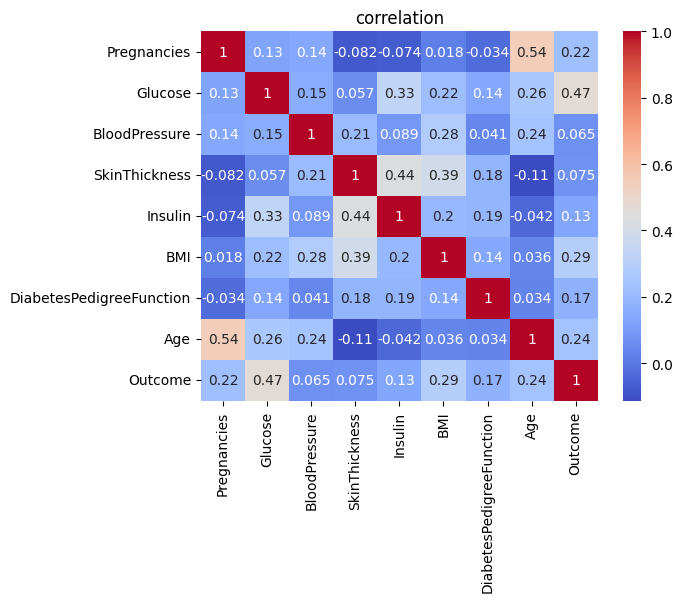

In [6]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('correlation')
plt.show()

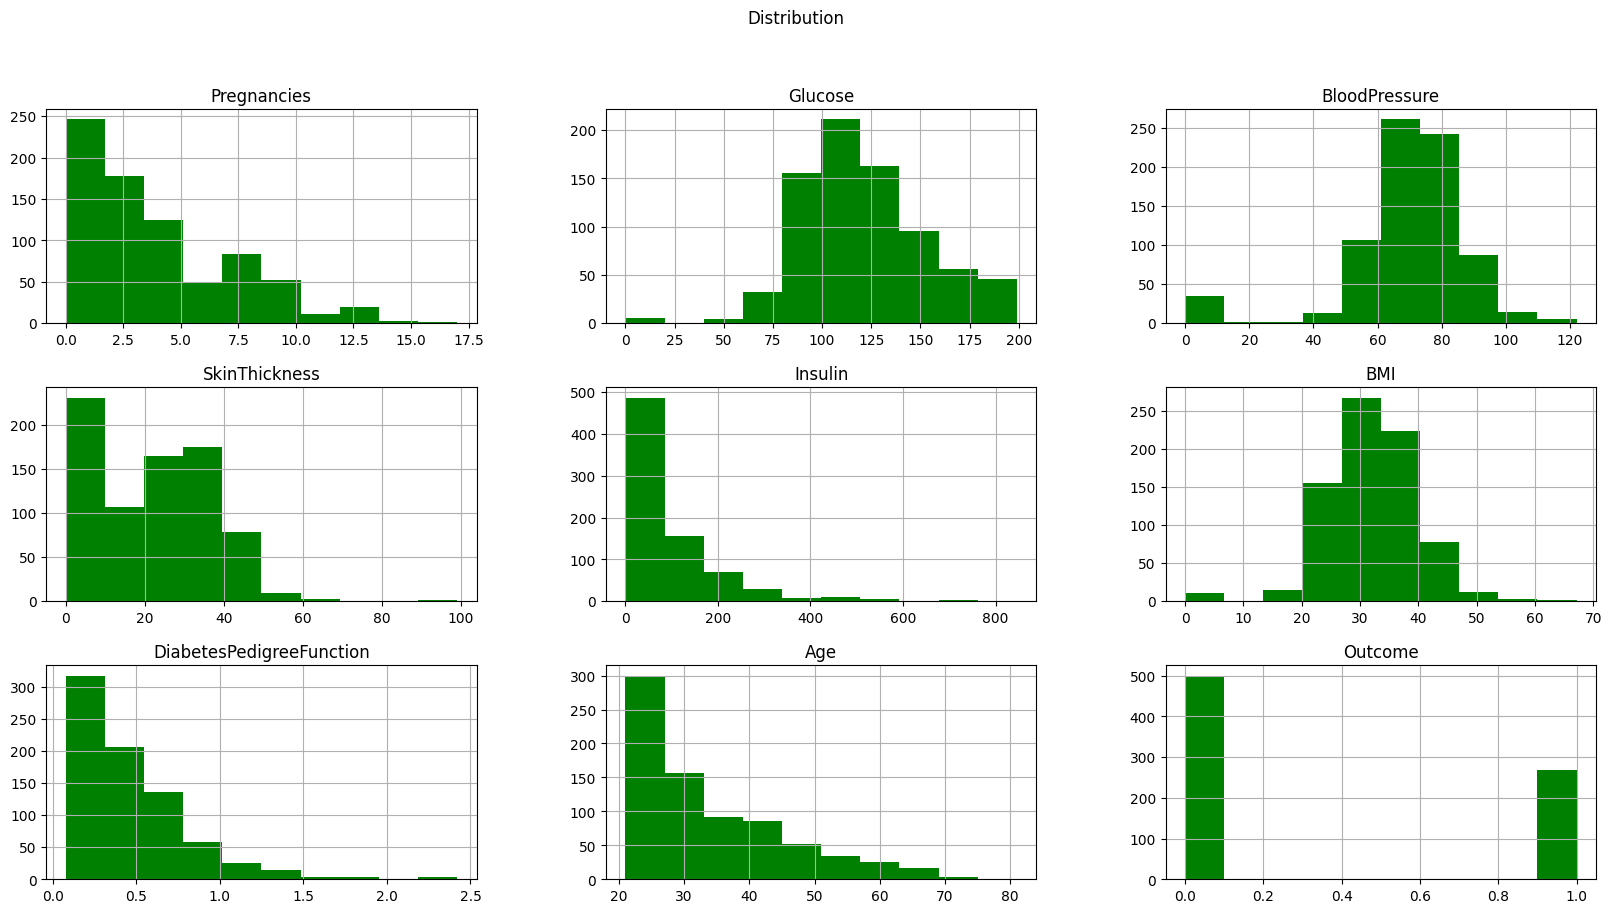

In [7]:
data.hist(bins=10, figsize=(20,10), color='green')
plt.suptitle("Distribution")
plt.show()

In [8]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Cleaning + Preprocessing

In [10]:
columns=[col for col in data.columns if col!='Outcome']
for col in columns:
    data[col]=data[col].fillna(data[col].mean())

# split data

In [12]:
from sklearn.model_selection import train_test_split
x=data.drop(columns='Outcome')
y=data['Outcome']
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [13]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9,165,88,0,0,30.4,0.302,49
534,1,77,56,30,56,33.3,1.251,24
344,8,95,72,0,0,36.8,0.485,57
296,2,146,70,38,360,28.0,0.337,29


# standardization

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x_test

array([[0.46153846, 0.26666667, 0.50877193, ..., 0.63909774, 0.25465839,
        0.47826087],
       [0.15384615, 0.37037037, 0.65789474, ..., 0.67105263, 0.03571429,
        0.        ],
       [0.15384615, 0.34074074, 0.56140351, ..., 0.57894737, 0.04347826,
        0.        ],
       ...,
       [0.61538462, 0.24444444, 0.63157895, ..., 0.69172932, 0.29736025,
        0.7826087 ],
       [0.15384615, 0.62222222, 0.61403509, ..., 0.52631579, 0.18245342,
        0.17391304],
       [0.61538462, 0.08888889, 0.61403509, ..., 0.66353383, 0.4681677 ,
        0.39130435]])

# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc

0.7597402597402597

# SVM

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model=SVC(max_iter=1000, random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc

0.7467532467532467

# Decission Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model=DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc

0.6948051948051948

# XGBoost

In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model=XGBClassifier(random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc

0.7272727272727273